# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
pymaceuticals_data_complete.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice.
mouse_count = len(mouse_metadata["Mouse ID"])
mouse_count

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = pymaceuticals_data_complete[pymaceuticals_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

repr(duplicate_rows)

"array(['g989'], dtype=object)"

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 

# Retrieve all data associated with the duplicate mouse ID
duplicate_mouse_rows = pymaceuticals_data_complete[pymaceuticals_data_complete['Mouse ID'].isin(duplicate_rows)]

# Display the data for the duplicate mouse ID
duplicate_mouse_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pd.reset_option('^display.', silent=True)
clean_mouse_data = pymaceuticals_data_complete[~pymaceuticals_data_complete['Mouse ID'].isin(duplicate_rows)]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [18]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_mouse_data['Mouse ID'].nunique()
clean_mice_count

248

## Bar and Pie Charts

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_drug_regimen = clean_mouse_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_drug_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_drug_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_drug_regimen['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_drug_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_drug_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_table = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

summary_statistics_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg = clean_mouse_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Summary Statistics

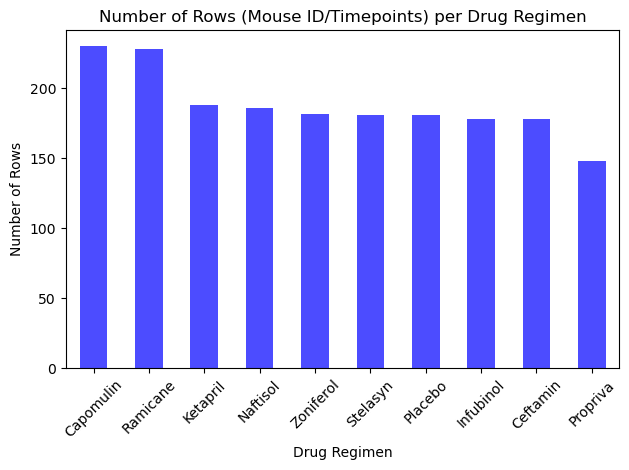

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = clean_mouse_data['Drug Regimen'].value_counts()
drug_regimen_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

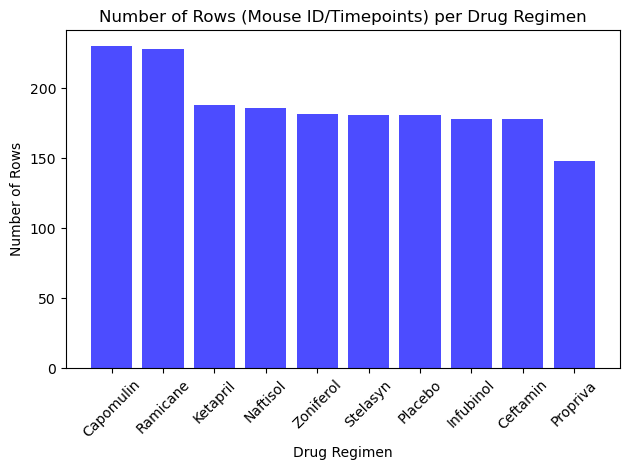

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_mouse_data['Drug Regimen'].value_counts()

# Get the names of the drug regimens and the corresponding counts
regimen_names = drug_regimen_counts.index
regimen_counts = drug_regimen_counts.values

# Create a bar chart using pyplot
plt.bar(regimen_names, regimen_counts, color='blue', alpha=0.7)
plt.title('Number of Rows (Mouse ID/Timepoints) per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

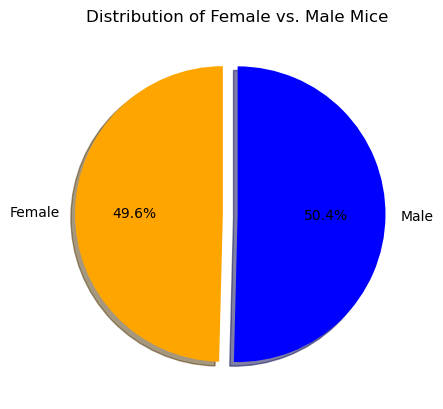

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_mouse_data.groupby('Sex')['Mouse ID'].nunique()

# Create a pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'], shadow=True, explode=[0.1,0])
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')  # This removes the 'Mouse ID' label from the side of the pie chart

# Display the plot
plt.show()

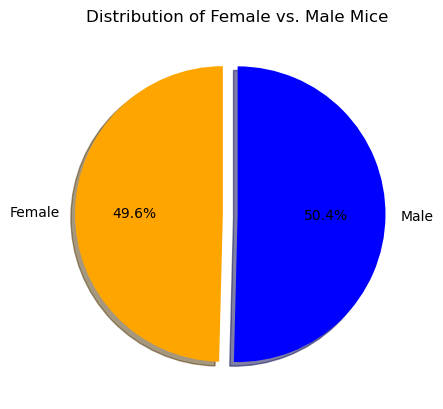

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distribution = clean_mouse_data.groupby('Sex')['Mouse ID'].nunique()

# Create labels for the sections of the pie chart
labels = gender_distribution.index

# Colors for each section
colors = ['orange', 'blue']

# Plot the pie chart
plt.pie(gender_distribution, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, explode=[0.1,0])
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_mouse_data[clean_mouse_data['Drug Regimen'].isin(treatments)]

# Find the last timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this data with the original DataFrame
merged_data = pd.merge(last_timepoint, clean_mouse_data, on=['Mouse ID', 'Timepoint'], how='left')

In [32]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volumes = []

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

outliers_data = {}

for drug in treatments:
    # Get the tumor volumes for the specific drug
    volumes = merged_data[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']

    # Compute the IQR
    quartiles = volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine the upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Check for potential outliers
    outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]
    outliers_data[drug] = outliers

    # Add the tumor volumes to our list
    tumor_volumes.append(volumes)

outliers_data

{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Infubinol': 15    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

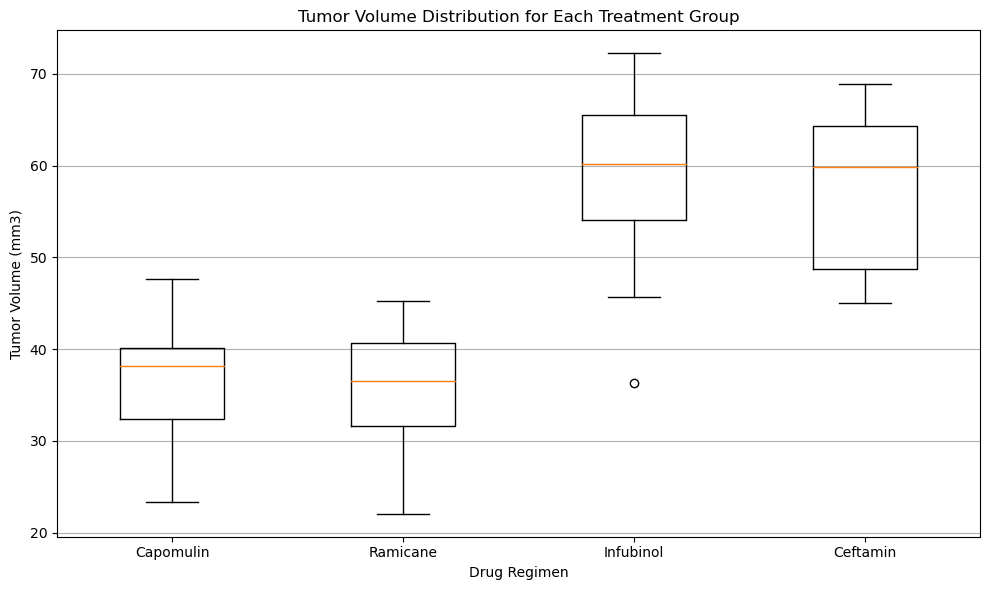

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Generate the box plot
plt.figure(figsize=(10,6))
plt.boxplot(tumor_volumes, labels=treatments)
plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True, axis='y')

# Display the box plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

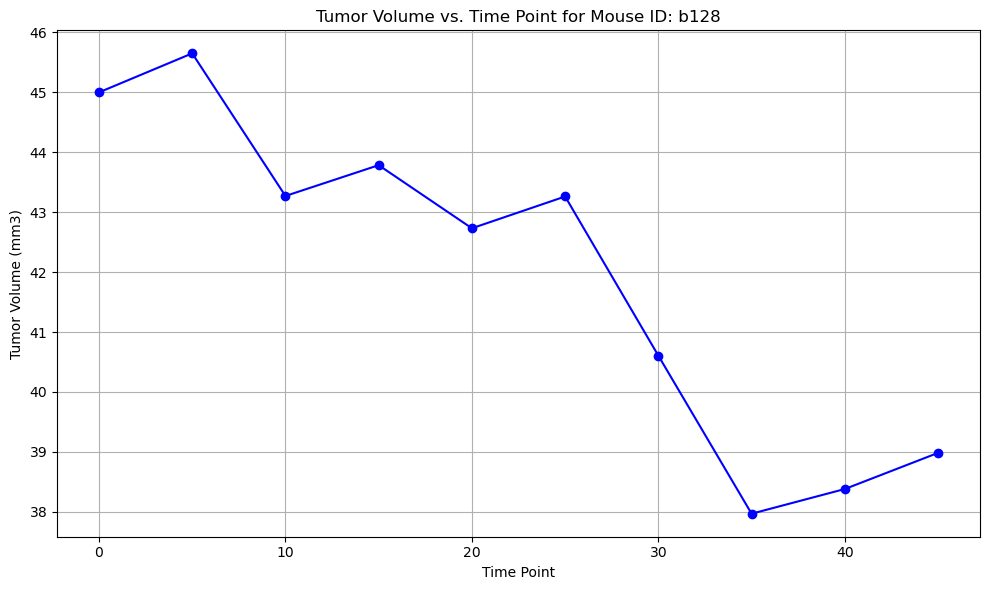

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_data = clean_mouse_data.loc[(clean_mouse_data['Mouse ID'] == 'b128') & (clean_mouse_data['Drug Regimen'] == 'Capomulin')]

# Generate the line plot
plt.figure(figsize=(10,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')
plt.title('Tumor Volume vs. Time Point for Mouse ID: b128')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

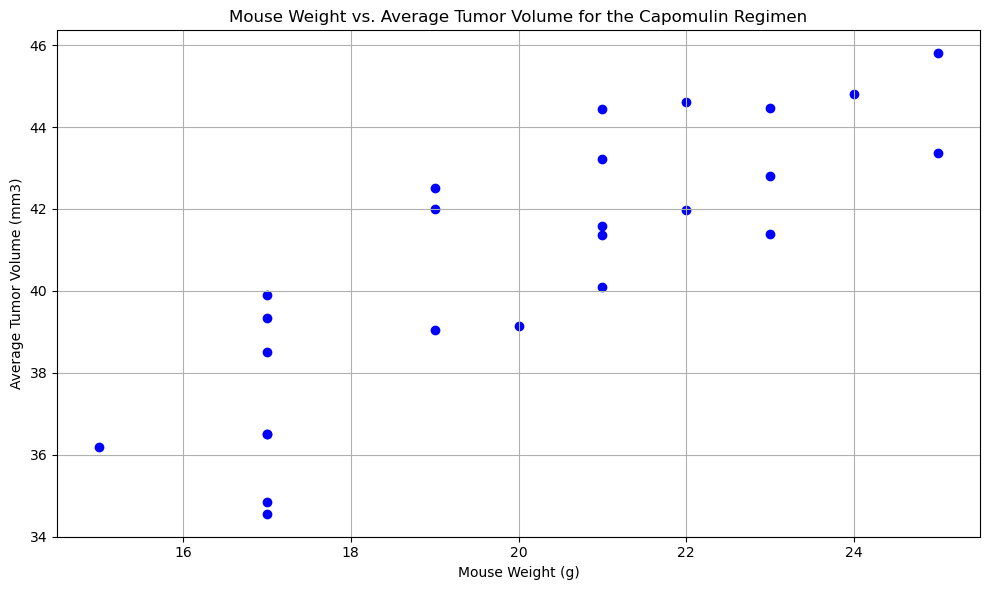

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']

# Step 2: Group by 'Mouse ID' and calculate the mean for each mouse
grouped_capomulin = capomulin_regimen_data.groupby('Mouse ID').mean(numeric_only=True)

# Step 3: Generate the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(grouped_capomulin['Weight (g)'], grouped_capomulin['Tumor Volume (mm3)'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Display the scatter plot
plt.tight_layout()
plt.show()

## Correlation and Regression 

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


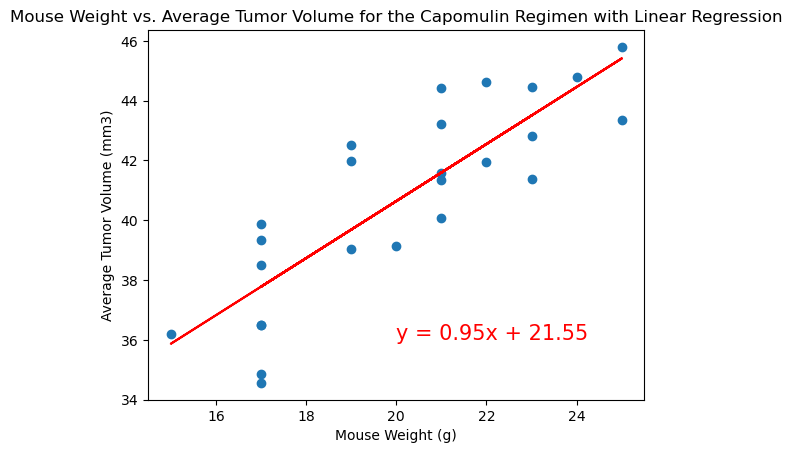

In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import pearsonr
from scipy.stats import linregress


capomulin_data = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']


# Step 2: Group by 'Mouse ID' and calculate the mean for each mouse
grouped_capomulin = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})


# Step 3: Calculate the correlation coefficient
correlation = pearsonr(grouped_capomulin['Weight (g)'], grouped_capomulin['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {correlation[0]:.2f}")

# Step 4: Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(grouped_capomulin['Weight (g)'], grouped_capomulin['Tumor Volume (mm3)'])
regress_values = grouped_capomulin['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Step 5: Generate the scatter plot with the linear regression line
plt.scatter(grouped_capomulin['Weight (g)'], grouped_capomulin['Tumor Volume (mm3)'])
plt.plot(grouped_capomulin['Weight (g)'], regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15, color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen with Linear Regression')
plt.show()